In [10]:
"""
Universidad del Valle de Guatemala
HT2 2
Mineria de datos
Roberto Rios, 20979
Javier Valle, 20159
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans

In [11]:
# Ejercicio 1

# Cargando el csv con pandas.
import pandas as pd

df = pd.read_csv("movies.csv", encoding='ISO-8859-1')

# Imprimendo todas las columnas.
print(df.columns)

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')


In [12]:
# ejercicio 2

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

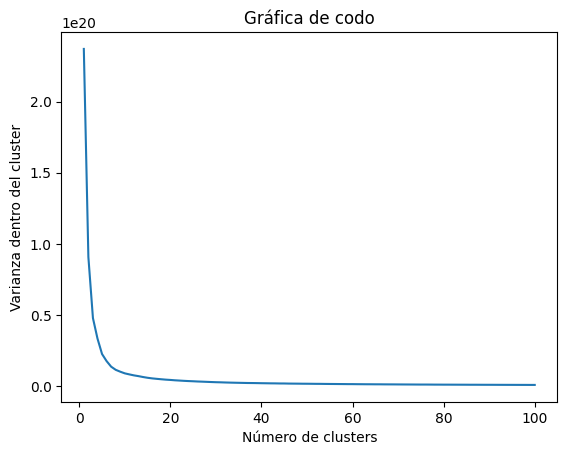

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

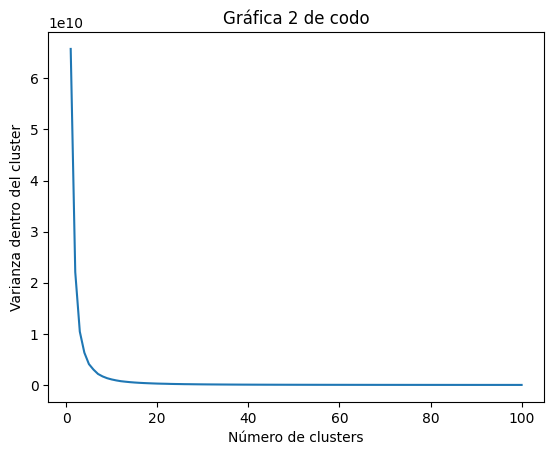

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

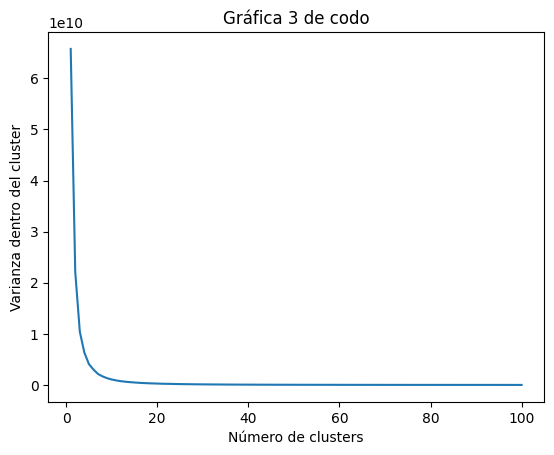

In [33]:
# Primera gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
X = np.array(df[["voteAvg", "voteCount", "popularity", "budget", "revenue", "runtime"]])


# Ejercicio 3: Calcular el número adecuado de grupos a formar.

clusters = range(1, 101)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()

# Segunda gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
Y = np.array(df[["genresAmount","voteAvg", "voteCount", "genresAmount"]])

clusters = range(1, 101)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica 2 de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()

# Tercera gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
Z = np.array(df[["productionCoAmount", "productionCountriesAmount", "actorsAmount", "castWomenAmount", "castMenAmount"]])

clusters = range(1, 101)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica 3 de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()